In [104]:
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import importlib.util
import sys

spec = importlib.util.spec_from_file_location("funcoes","../lib/funcoes.py")
funcoes = importlib.util.module_from_spec(spec)
sys.modules["funcoes"] = funcoes
spec.loader.exec_module(funcoes)

PATH_IMG = "../IMAGENS/"

PATH = os.getcwd()

print(os.getcwd())
print(os.listdir(PATH_IMG))
print(cv.__version__)

img_original = cv.imread(PATH_IMG + os.listdir(PATH_IMG)[1])
img_gray = cv.cvtColor(img_original, cv.COLOR_BGR2GRAY)

/home/andre/Documents/Git/VISAO_ROBOTICA_EGM0008/05_FILTRAGEM_DE_IMAGENS
['circulo.png', 'Lenna.png', 'carrinho.jpg', 'Einstein.png', 'everest.jpg', 'fabio.png']
4.10.0


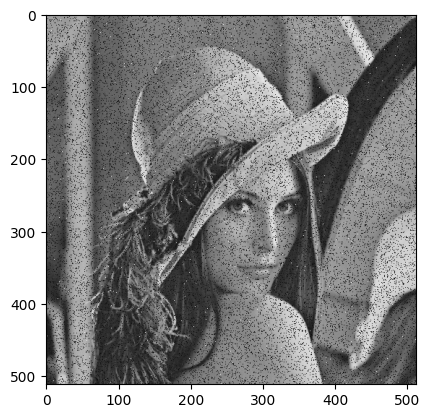

In [105]:
noise = np.uint8(0.15*np.random.normal(128, 63.5, size=(img_gray.shape[0],img_gray.shape[1])))
mask = np.random.rand(*img_gray.shape) < 0.1

img_noise = np.copy(img_gray)
img_noise[mask] = noise[mask]

plt.imshow(img_noise, cmap="gray")

plt.show()

In [106]:
# Funcao para gerar o Kernel da mediana
def kernel_mediana(size):
    kernel = np.zeros((size,size), dtype=np.uint8)

    kernel[np.uint8(size/(size/2)), np.uint8(size/(size/2))] = 1

    return kernel

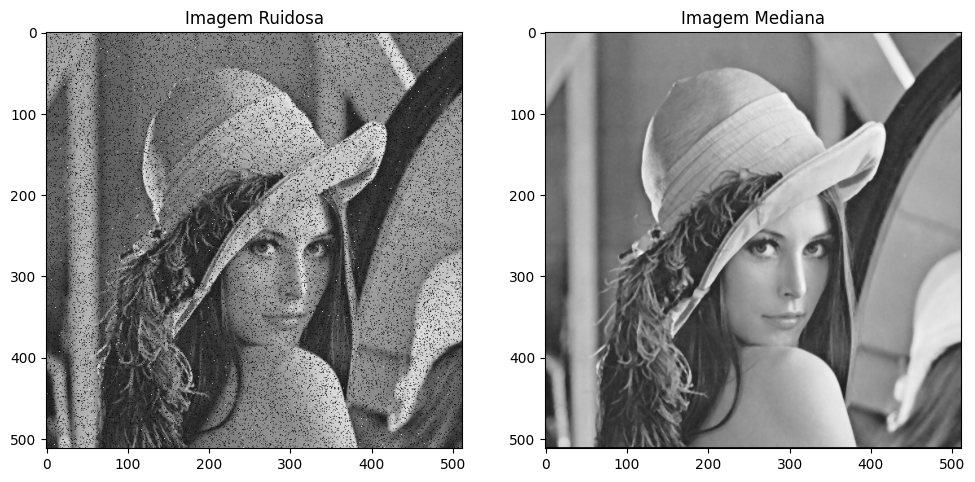

In [111]:
filtro_mediana = kernel_mediana(3)

llin = int(3/2)
lcol = int(3/2)

img_mediana = np.zeros_like(img_gray)

for i in range(llin, img_gray.shape[0] - llin):
    for j in range(lcol, img_gray.shape[1] - lcol):
        janela = img_gray[(i-llin):(i+llin+1), (j-lcol):(j+lcol+1)]

        img_mediana[i,j] = np.median(janela)

# img_mediana = funcoes.filtro_espacial(img_noise, filtro_mediana)

plt.figure(figsize=(funcoes.cm_to_inch(30),funcoes.cm_to_inch(30)))
plt.subplot(121)
plt.title("Imagem Ruidosa")
plt.imshow(img_noise, cmap="gray")

plt.subplot(122)
plt.title("Imagem Mediana")
plt.imshow(img_mediana, cmap="gray")

plt.show()

In [108]:
# del noise, img_noise, filtro_mediana